<a href="https://colab.research.google.com/github/Himanshu-1703/colab_notebooks/blob/main/bias_variance_tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from mlxtend.evaluate import bias_variance_decomp as decompose

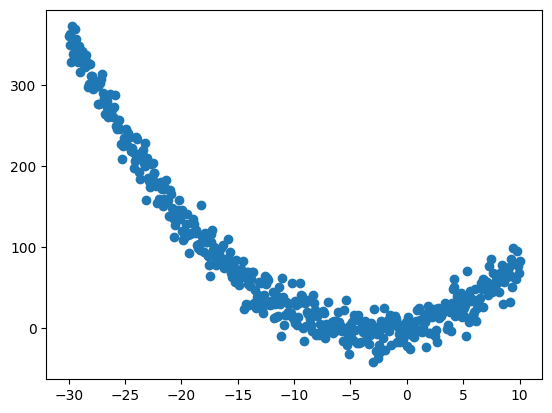

In [ ]:
# generate the data
X = np.linspace(-30,10,500)
y = (0.5 * (X ** 2)) + (3 * X) + (15 * np.random.randn(500))

# plot the data
plt.scatter(X,y)
plt.show()


- The data is polynomial in nature and fitting linear regression on this data will not yield good results.

In [ ]:
# shape of X and y
print('The shape of X is',X.shape)
print('The shape of y is',y.shape)

The shape of X is (500,)
The shape of y is (500,)


In [ ]:
# Do train test split of the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=67)

# shape of X_train and X_test
print('The shape of X_train is',X_train.shape)
print('The shape of X_test is',X_test.shape)

The shape of X_train is (400,)
The shape of X_test is (100,)


In [ ]:
# reshpe the data to 2D
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# fit the data on linear regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# fit the polynomial features of degree 2
poly = PolynomialFeatures(degree=2,include_bias=False)
poly.fit(X_train.reshape(-1,1))

# transform the train and test
X_train_poly = poly.transform(X_train.reshape(-1,1))
X_test_poly = poly.transform(X_test.reshape(-1,1))

print('The shape of X_train after transformation is',X_train_poly.shape)
print('The shape of X_test after transformation is',X_test_poly.shape)

# fit the linear regression on the transformed data

lr = LinearRegression()

# fit on the data
lr.fit(X_train_poly,y_train)

# predict on the test data
y_pred = lr.predict(X_test_poly)

# calculate the r2 score
score = r2_score(y_test,y_pred)
score

The shape of X_train after transformation is (400, 2)
The shape of X_test after transformation is (100, 2)


0.9717310240861537

In [ ]:
# coeficients and intercept value

print('The coefficient value is',lr.coef_[0])
print('The intercept value is',lr.intercept_)


The coefficient value is 2.943386754352447
The intercept value is 0.7591880227378738


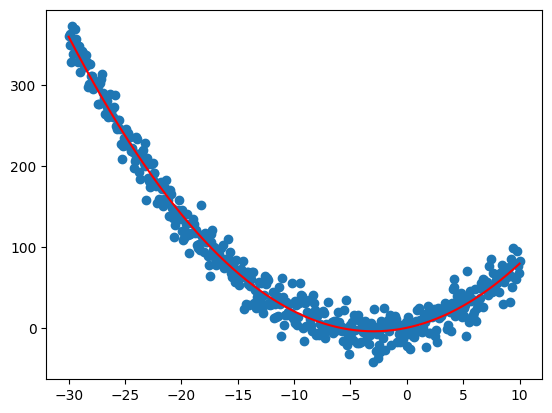

In [ ]:
# plot the regression line on the graph
X_temp = np.linspace(-30,10,500).reshape(-1,1)

# transform the sample to polynomial degree 2
X_temp_poly = poly.transform(X_temp)


# predict on the sample data
y_pred_temp = lr.predict(X_temp_poly)

# plot the data
plt.scatter(X,y)

# plot the regression line
plt.plot(X_temp[:,0],y_pred_temp,color='red')
plt.show()


Fitting polynomial regression on degree 2 gives us a good accuracy score.

The polynomial features is able to match the data accurately and the accuracy score is also good.

In [ ]:
import pandas as pd

In [ ]:
# generate 3 samples out of the data

# make a data frame of X and y
df = pd.DataFrame({'X':X,'y':y})
df.head()

# make sample 1
sample1 = df.sample(10,random_state=1)

# make sample 2
sample2 = df.sample(10,random_state=4)

# make sample 3
sample3 = df.sample(10,random_state=3)

print('The shape of 3 samples is',sample1.shape,sample2.shape,sample3.shape)

The shape of 3 samples is (10, 2) (10, 2) (10, 2)


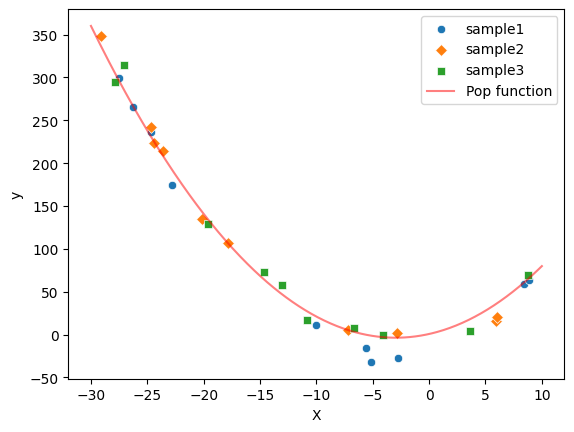

In [ ]:
# plot the samples on the scatter plot

# plot the scatter plot of samples
sns.scatterplot(data=sample1,x='X',y='y',marker='o',label='sample1')
sns.scatterplot(data=sample2,x='X',y='y',marker='D',label='sample2')
sns.scatterplot(data=sample3,x='X',y='y',marker='s',label='sample3')

# plot the regression line
sns.lineplot(x=X_temp[:,0],y=y_pred_temp,color='red',alpha=0.5,label='Pop function')


plt.legend()
plt.savefig('sample.png')
plt.show()

- The data points indicate the sample data taken out from the population data. 3 Samples are taken out from the population data.

- The orange curve is able to map the population function.

In [ ]:
# fit the linear regression on the samples

lr1 = LinearRegression()
lr2 = LinearRegression()
lr3 = LinearRegression()

# fit the model on the data
lr1.fit(sample1[['X']],sample1['y'])
lr2.fit(sample2[['X']],sample2['y'])
lr3.fit(sample3[['X']],sample3['y'])

# predict on the regression lines
line1 = lr1.predict(X_temp)
line2 = lr2.predict(X_temp)
line3 = lr3.predict(X_temp)

# calculate the r2 scores
print('The r2 score for sample 1 is',r2_score(sample1['y'],lr1.predict(sample1[['X']])))
print('The r2 score for sample 2 is',r2_score(sample2['y'],lr2.predict(sample2[['X']])))
print('The r2 score for sample 3 is',r2_score(sample3['y'],lr3.predict(sample3[['X']])))

The r2 score for sample 1 is 0.616080232344319
The r2 score for sample 2 is 0.8065185715639959
The r2 score for sample 3 is 0.611092462384685


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


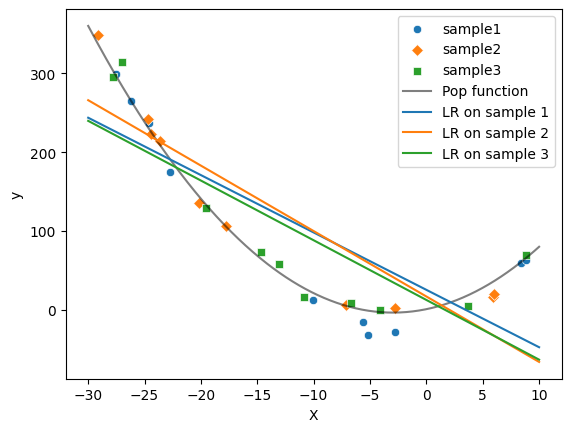

In [ ]:
# plot the linear regression on the graph

# plot the samples on the scatter plot

# plot the scatter plot of samples
sns.scatterplot(data=sample1,x='X',y='y',marker='o',label='sample1')
sns.scatterplot(data=sample2,x='X',y='y',marker='D',label='sample2')
sns.scatterplot(data=sample3,x='X',y='y',marker='s',label='sample3')

# plot the regression line
sns.lineplot(x=X_temp[:,0],y=y_pred_temp,color='black',alpha=0.5,label='Pop function')
sns.lineplot(x=X_temp[:,0],y=line1,label='LR on sample 1')
sns.lineplot(x=X_temp[:,0],y=line2,label='LR on sample 2')
sns.lineplot(x=X_temp[:,0],y=line3,label='LR on sample 3')


plt.legend()
plt.show()

- The accuracy of the linear function is low because it is not able to map the population function properly.

- The regression line is fit on the polynomial data which does not give good accuracy.

- The linear regression models are those which have a high bias and a low variance which means that the models fit on samples have their best fit line nearby and the variance between the parameters value is less.

- This means that the linear regression model is underfitting on the data because it is not able to capture the true mathematical relationship between the input and the output columns.

- This also states that the accuracy of these models trained on different samples is near about the same on the other data sets as well.

In [ ]:
# plot the polynomial features with degree 5

poly = PolynomialFeatures(degree=9,include_bias=False)

# transform the data

sample1_poly = poly.fit_transform(sample1[['X']])
sample2_poly = poly.fit_transform(sample2[['X']])
sample3_poly = poly.fit_transform(sample3[['X']])


# fit the linear regression on the samples

lr1 = LinearRegression()
lr2 = LinearRegression()
lr3 = LinearRegression()

# fit the model on the data
lr1.fit(sample1_poly,sample1['y'])
lr2.fit(sample2_poly,sample2['y'])
lr3.fit(sample3_poly,sample3['y'])

# predict on the regression lines
line1 = lr1.predict(sample1_poly)
line2 = lr2.predict(sample2_poly)
line3 = lr3.predict(sample3_poly)

# calculate the r2 scores
print('The r2 score for sample 1 is',r2_score(sample1['y'],line1))
print('The r2 score for sample 2 is',r2_score(sample2['y'],line2))
print('The r2 score for sample 3 is',r2_score(sample3['y'],line3))

The r2 score for sample 1 is 0.9999999676653084
The r2 score for sample 2 is 0.9999992749113866
The r2 score for sample 3 is 0.9999999835748428


- If we try to pass the regression curv through each point of the trainig data we get very good results on the training set which is observed above that when the model complexity is increased (In this case a higher order polynomial) is used, it results in increased accuracy on the train set.

> But now because the model complexity is so high, the model is actually **overfitting** which means in this kind of scenario the variance is very high and the model shows reduced accuracy whenever the training data is changed.


**Robustness to new data in an overfitted model decreases.**.

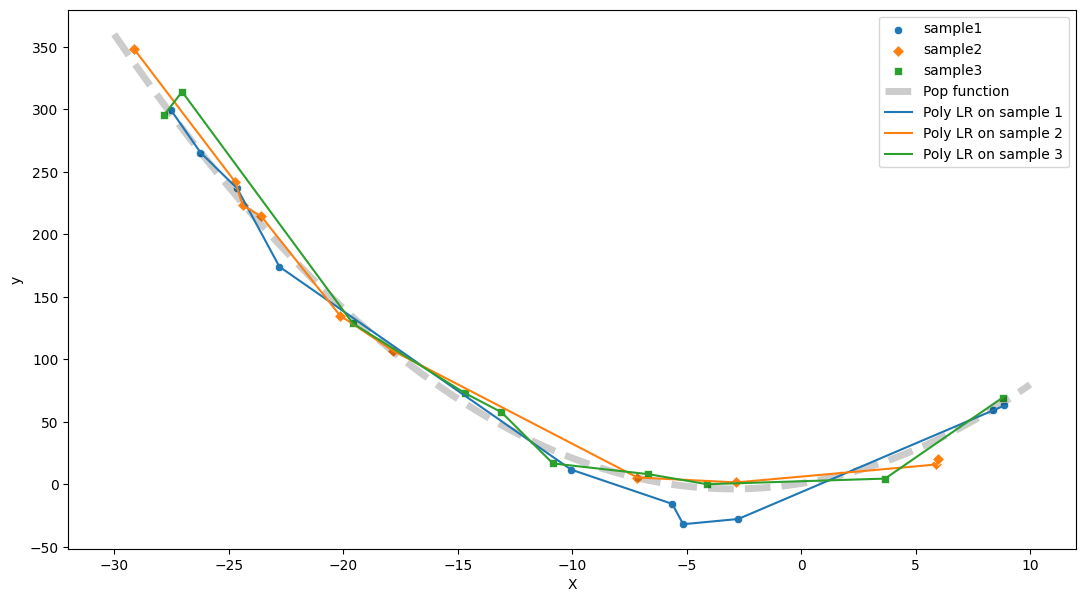

In [ ]:
# plot the linear regression on the graph

plt.figure(figsize=(13,7))

# plot the samples on the scatter plot

# plot the scatter plot of samples
sns.scatterplot(data=sample1,x='X',y='y',marker='o',label='sample1')
sns.scatterplot(data=sample2,x='X',y='y',marker='D',label='sample2')
sns.scatterplot(data=sample3,x='X',y='y',marker='s',label='sample3')

# plot the regression line
sns.lineplot(x=X_temp[:,0],y=y_pred_temp,color='k',alpha=0.2,label='Pop function',linestyle='--',linewidth=5)
sns.lineplot(x=sample1['X'],y=line1,label='Poly LR on sample 1')
sns.lineplot(x=sample2['X'],y=line2,label='Poly LR on sample 2')
sns.lineplot(x=sample3['X'],y=line3,label='Poly LR on sample 3')


plt.legend()
plt.show()

In [ ]:
# calculate the r2 scores of lr1 model
print('The r2 score for sample 1 is',r2_score(sample1['y'],lr1.predict(sample1_poly)))
print('The r2 score for sample 2 is',r2_score(sample2['y'],lr1.predict(sample2_poly)))
print('The r2 score for sample 3 is',r2_score(sample3['y'],lr1.predict(sample3_poly)))

The r2 score for sample 1 is 0.9999999676653084
The r2 score for sample 2 is -9.956822044284205
The r2 score for sample 3 is -9.579925878297567


In [ ]:
# calculate the r2 scores of lr2 model
print('The r2 score for sample 1 is',r2_score(sample1['y'],lr2.predict(sample1_poly)))
print('The r2 score for sample 2 is',r2_score(sample2['y'],lr2.predict(sample2_poly)))
print('The r2 score for sample 3 is',r2_score(sample3['y'],lr2.predict(sample3_poly)))

The r2 score for sample 1 is -23175.964702274363
The r2 score for sample 2 is 0.9999992749113866
The r2 score for sample 3 is -17825.6197524254


In [ ]:
# calculate the r2 scores for lr3 model

print('The r2 score for sample 1 is',r2_score(sample1['y'],lr3.predict(sample1_poly)))
print('The r2 score for sample 2 is',r2_score(sample2['y'],lr3.predict(sample2_poly)))
print('The r2 score for sample 3 is',r2_score(sample3['y'],lr3.predict(sample3_poly)))

The r2 score for sample 1 is -3.9040258780244574
The r2 score for sample 2 is -19.639273555235746
The r2 score for sample 3 is 0.9999999835748428


The scores clearly shows that in an overfitted model because of the high variance, whenever a new data comes the model accuracy actually plummets down a lot and even shows negative accuracy in our case.

- The prediction of overfitted model on new model is way off and the error is very large.